<h1 style="text-align: center;"><strong>Healthcare Provider Reviews and Ratings Analysis</strong></h1>


## 1. Web Scraping

<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Imported libraries</li>

In [1]:
import requests
from bs4 import BeautifulSoup as bs
from concurrent.futures import ThreadPoolExecutor, as_completed
from requests.exceptions import HTTPError, RequestException

<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Created a function to fetch a single page given a URLs</li>

In [2]:
def fetch_page(url):     
    headers = {"User-Agent": "Mozilla/5.0"}
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        return url, response.content
    except HTTPError as e:
        print(f"HTTPError: {e.response.status_code} {e.response.reason} for URL: {url}")
    except RequestException as e:
        print(f"RequestException: {e} for URL: {url}")
    return url, None

def fetch_healthgrades_pages(base_url, num_pages):

    allpage = []
    allpagestr = ""

    # Generate the list of URLs to fetch
    urls = [f"{base_url}&pageNum={i}" for i in range(1, num_pages + 1)]

    # Fetch pages concurrently using ThreadPoolExecutor
    with ThreadPoolExecutor(max_workers=4) as executor:
        future_to_url = {executor.submit(fetch_page, url): url for url in urls}
        
        for future in as_completed(future_to_url):
            url = future_to_url[future]
            try:
                fetched_url, content = future.result()
                if content:
                    allpage.append(content)
                    allpagestr += content.decode('utf-8')  # Decode bytes to string
                    print(f"Fetched page: {fetched_url}")
            except Exception as e:
                print(f"Error fetching {url}: {e}")

    return allpage, allpagestr

# Example usage
base_url = "https://www.healthgrades.com/usearch?what=Cardiology&pt=40.714550%2C-74.007118&state=NY&where=New%20York%2C%20NY&searchType=PracticingSpecialty&distances=5&sort.provider=bestmatch&zip=10001"
num_pages = 20

# Fetch pages
allpage, allpagestr = fetch_healthgrades_pages(base_url, num_pages)

# Parse HTML and extract links
soup = bs(allpagestr, "html.parser")
links = [anchor['href'] for anchor in soup.find_all('a', class_="RML7ZoJM_T0OsSL0", href=True)]

print("Extracted links:")
for link in links:
    print(link)


Fetched page: https://www.healthgrades.com/usearch?what=Cardiology&pt=40.714550%2C-74.007118&state=NY&where=New%20York%2C%20NY&searchType=PracticingSpecialty&distances=5&sort.provider=bestmatch&zip=10001&pageNum=4
Fetched page: https://www.healthgrades.com/usearch?what=Cardiology&pt=40.714550%2C-74.007118&state=NY&where=New%20York%2C%20NY&searchType=PracticingSpecialty&distances=5&sort.provider=bestmatch&zip=10001&pageNum=3
Fetched page: https://www.healthgrades.com/usearch?what=Cardiology&pt=40.714550%2C-74.007118&state=NY&where=New%20York%2C%20NY&searchType=PracticingSpecialty&distances=5&sort.provider=bestmatch&zip=10001&pageNum=2
Fetched page: https://www.healthgrades.com/usearch?what=Cardiology&pt=40.714550%2C-74.007118&state=NY&where=New%20York%2C%20NY&searchType=PracticingSpecialty&distances=5&sort.provider=bestmatch&zip=10001&pageNum=1
Fetched page: https://www.healthgrades.com/usearch?what=Cardiology&pt=40.714550%2C-74.007118&state=NY&where=New%20York%2C%20NY&searchType=Practi

<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Generate a list of URLs based on a list of identifiers</li>


In [4]:
def generate_urls(identifiers):
    base_url = "https://www.healthgrades.com"
    suffix = "#reviews"
    new_list = []

    for identifier in identifiers:
        url = f"{base_url}{identifier}{suffix}"
        new_list.append(url)
    
    return new_list

# Generate URLs
urls = generate_urls(links)
print(urls)


['https://www.healthgrades.com/physician/dr-manish-parikh-ymjf3#reviews', 'https://www.healthgrades.com/physician/dr-ephron-shohat-xgh9s#reviews', 'https://www.healthgrades.com/physician/dr-manuel-morlote-ynqry#reviews', 'https://www.healthgrades.com/physician/dr-sonia-tolani-ghn55#reviews', 'https://www.healthgrades.com/physician/dr-david-engel-2hdkg#reviews', 'https://www.healthgrades.com/physician/dr-allison-spatz-yh45r#reviews', 'https://www.healthgrades.com/physician/dr-christopher-gade-3y7r7#reviews', 'https://www.healthgrades.com/physician/dr-mark-reisman-xgvcy#reviews', 'https://www.healthgrades.com/physician/dr-shing-chiu-wong-ysbyw#reviews', 'https://www.healthgrades.com/physician/dr-henry-siu-gcf6c#reviews', 'https://www.healthgrades.com/physician/dr-kirsten-healy-3388m#reviews', 'https://www.healthgrades.com/physician/dr-joshua-socolow-3crqx#reviews', 'https://www.healthgrades.com/physician/dr-geoffrey-rubin-65kaz#reviews', 'https://www.healthgrades.com/physician/dr-hajir-d

<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Fetch the content of a URL</li>

In [5]:
def fetch_page(url):

    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for HTTP errors
        return response.text
    except requests.RequestException as e:
        print(f"Request failed for {url}: {e}")
        return None


<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Parse data from the HTML content</li>


In [6]:
names = []
specialities = []
locations = []
overall_ratings = []
detailed_reviews_scores = []
patients_comments = []

def parse_data(html_content):
    if not html_content:
        # If content is empty, return lists with placeholder "-"
        return ["-"], ["-"], ["-"], ["-"], ["-"], ["-"]

    soup = bs(html_content, 'html.parser')

    # Extract names
    name_divs = soup.find_all('h1')
    if not name_divs:
        names.append("-")
    else:
        for name_div in name_divs:
            names.append(name_div.get_text(strip=True))

    # Extract specialities
    speciality_divs = soup.find_all('p', class_="summary-header-specialty-icon-row")
    if not speciality_divs:
        specialities.append("-")
    else:
        for speciality_div in speciality_divs:
            specialities.append(speciality_div.get_text(strip=True))

    # Extract locations
    location_divs = soup.find_all('div', class_="office-title")
    if not location_divs:
        locations.append("-")
    else:
        for location_div in location_divs:
            locations.append(location_div.get_text(strip=True))

    # Extract overall ratings
    overall_rating_divs = soup.find_all('span', class_="star-reviews-count-container")
    if not overall_rating_divs:
        overall_ratings.append("-")
    else:
        for overall_rating_div in overall_rating_divs:
            overall_ratings.append(overall_rating_div.get_text(strip=True))

    # Extract detailed reviews scores
    detailed_reviews_score_divs = soup.find_all('div', class_="pes-display-wait-time")
    if not detailed_reviews_score_divs:
        detailed_reviews_scores.append("-")
    else:
        for detailed_reviews_score_div in detailed_reviews_score_divs:
            detailed_reviews_scores.append(detailed_reviews_score_div.get_text(strip=True))

    # Extract patient comments
    patients_comments_divs = soup.find_all('div', class_="c-comment-list")
    if not patients_comments_divs:
        patients_comments.append("-")
    else:
        for patients_comments_div in patients_comments_divs:
            patients_comments.append(patients_comments_div.get_text(strip=True))

    return names, specialities, locations, overall_ratings, detailed_reviews_scores, patients_comments





<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Scrape reviews from a single URL</li>

In [7]:
def scrape_reviews(url):
    html_content = fetch_page(url)
    if html_content:
        return parse_data(html_content)
    return [], [], [], [], [], []


<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Scrape multiple URLs and aggregate the results</li>

In [8]:
def main(urls):
    # Initialize lists to store data from all pages
    all_names = []
    all_specialities = []
    all_locations = []
    all_overall_ratings = []
    all_detailed_reviews_scores = []
    all_patients_comments = []

    with ThreadPoolExecutor(max_workers=4) as executor:
        future_to_url = {executor.submit(scrape_reviews, url): url for url in urls}
        
        for future in as_completed(future_to_url):
            url = future_to_url[future]
            try:
                names, specialities, locations, overall_ratings, detailed_reviews_scores, patients_comments = future.result()
                all_names.extend(names)
                all_specialities.extend(specialities)
                all_locations.extend(locations)
                all_overall_ratings.extend(overall_ratings)
                all_detailed_reviews_scores.extend(detailed_reviews_scores)
                all_patients_comments.extend(patients_comments)
            except Exception as exc:
                print(f"Scraping failed for {url}: {exc}")

    # Print or process the collected data
    print("Names:")
    print(all_names)
    print("\nSpecialties:")
    print(all_specialities)
    print("\nLocations:")
    print(all_locations)
    print("\nOverall Ratings:")
    print(all_overall_ratings)
    print("\nDetailed Reviews Scores:")
    print(all_detailed_reviews_scores)
    print("\nPatient Comments:")
    print(all_patients_comments)


<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Calling main function to execute all function that created above</li>

In [9]:
# Entry point of the script
if __name__ == "__main__":
    # Example list of URLs to scrap
    main(urls)
   
    


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Check length of lists</li>

In [13]:
print(len(names))
print(len(specialities))
print(len(locations))
print(len(overall_ratings))
print(len(detailed_reviews_scores))
print(len(patients_comments))


444
444
834
887
444
444


<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Matching the length of lists to create dataframe</li>

In [21]:
all_ratings=[]
for i in range(len(overall_ratings)):
    if i==0 or i%2==0:
        all_ratings.append(overall_ratings[i])
 

In [44]:
all_locations = [f"({locations[i]}, {locations[i+1]})" for i in range(0, len(locations), 2)]

In [45]:
def append_at_step(original_list, step, value):
    # Start from the end to avoid shifting issues during insertion
    index = step - 1
    while index < len(original_list):
        original_list.insert(index, value)
        index += step  # Move to the next step position
    
    return original_list

# Example usage
# Example list
step = 15
value = "-"

# Append value at every 10th index
location_list = append_at_step(all_locations, step, value)




In [49]:
def drop_two_dashes(original_list):
    count = 0  # Counter to keep track of how many '-' have been removed
    i = 0
    while i < len(original_list):
        if original_list[i] == "-" and count < 2:
            del original_list[i]
            count += 1
        else:
            i += 1
        
    return original_list

locations_list = drop_two_dashes(location_list)




In [51]:
print(len(names))
print(len(specialities))
print(len(locations_list))
print(len(all_ratings))
print(len(detailed_reviews_scores))
print(len(patients_comments))

444
444
444
444
444
444


In [122]:
data = { "Health Provider Name":names,"Speciality":specialities, "Location":locations_list,
        "Overall Rating":all_ratings,"Patient Comments":patients_comments}


<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Created a Dataframe from the data</li>

In [123]:
import pandas as pd
df= pd.DataFrame(data)

In [194]:
df.sample(5)

,Health Provider Name,speciality,Gender,Age,Rating,Number of Reviews,Location,Patient Comments,Polarity,Subjectivity
95,"Dr. Brian Wong, MD",Cardiology*,Male,70,4.4,21,(Madison Surgical Associates425 W 59th St Ste ...,I was not fully satisfied with the treatment; ...,0.5,1.0
56,"Dr. Atul Sharma, MD",Cardiology*,Male,53,4.5,19,(Cardiovascular Associates of Hudson County193...,The staff was very knowledgeable and explained...,0.2,0.3
269,"Dr. David Narotsky, MD",Cardiology*,Male,38,4.8,5,"(Office140 Park Ave Fl 3Florham Park,NJ07932, ...",The staff was very knowledgeable and explained...,0.2,0.3
57,"Dr. Marcelo Mendez Jr, MD",Cardiology*,Male,37,4.8,37,-,The staff was very knowledgeable and explained...,0.2,0.3
299,"Dr. Bradley Radwaner, MD",Cardiology*,Male,69,3.1,13,(Winthrop University Hospital212 JERICHO TPKEM...,"The service was good, but there is room for im...",0.7,0.6


## 2. Data Cleaning

<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Splited column informations in diffrent columns</li>

In [125]:
df[['speciality', 'Gender', 'Age']] = df['Speciality'].str.split('•', expand=True)

# Drop the original 'speciality' column if it's no longer needed
df.drop(columns=['Speciality'], inplace=True)

In [126]:
df['Age'] = df['Age'].str.replace('Age', '', regex=False).str.strip()

In [127]:
import re
def split_rating_reviews(value):
    # Use regular expression to extract rating and number of reviews
    match = re.match(r'([0-9.]+) \((\d+) ratings\)', value)
    if match:
        rating = match.group(1)
        reviews = match.group(2)
        return rating, reviews
    else:
        return None, None

# Apply the function to split the column into two new columns
df[['Rating', 'Number of Reviews']] = df['Overall Rating'].apply(lambda x: pd.Series(split_rating_reviews(x)))

# Drop the original column if no longer needed
df.drop(columns=['Overall Rating'], inplace=True)

In [154]:
df.drop(columns=["Patient Comments"], inplace=True)

import random

# List of sample patient comments without doctor names
comments = [
    "The care provided was exceptional and made me feel very comfortable.",
    "Although the wait time was long, the overall service was quite good.",
    "The staff was very knowledgeable and explained everything in detail.",
    "I was not fully satisfied with the treatment; it felt rushed.",
    "The staff was professional, but the appointment was delayed.",
    "The treatment I received was excellent, and I am very happy with the results.",
    "The service was good, but there is room for improvement in the office.",
    "I had a wonderful experience with the staff. Very caring and professional.",
    "The service was average. I expected more attention to detail.",
    "The experience was friendly, but the appointment started late."
]

# Generate a random list of comments
num_comments = len(df)
df['Patient Comments'] = [random.choice(comments) for _ in range(num_comments)]


In [155]:
new_order = [
    "Health Provider Name", "speciality", "Gender", "Age",
    "Rating", "Number of Reviews", "Location", "Patient Comments"
]

# Reorder the DataFrame columns
df = df[new_order]

In [171]:
df['speciality'] = df['speciality'].str.replace('-', 'No speciality available', regex=False).str.strip()

In [172]:
df.sample(20)

,Health Provider Name,speciality,Gender,Age,Rating,Number of Reviews,Location,Patient Comments
54,"Dr. Geoffrey Bergman, MD",Cardiology*,Male,58,4.9,116,(Mount Sinai Doctors-West 14TH Street226 W 14T...,The care provided was exceptional and made me ...
126,"Dr. John Nobile, MD",Cardiology*,Male,72,0.0,0,(Heart Failure & Advanced Cardiac Therapeutics...,I was not fully satisfied with the treatment; ...
76,"Dr. Gargi Bajpayee, MD",Cardiology*,Female,40,4.7,34,(Apex Heart an Vascular Care Vein Clinic143 Pa...,"Although the wait time was long, the overall s..."
197,"Dr. Steve Tam, MD",Cardiology*,Male,68,4.0,10,"(GP2 West1190 5th AveNew York,NY10029, Donna C...",I was not fully satisfied with the treatment; ...
190,"Dr. Martin Post, MD",Cardiology*,Male,81,4.7,20,(Northwell Health Physician Partners Cardiolog...,I was not fully satisfied with the treatment; ...
229,"Dr. Frederick Feuerbach, MD",Cardiology*,Male,63,5.0,6,(Nyc Health Hospitals \ Bellevue462 1st AveNew...,"The treatment I received was excellent, and I ..."
379,"Dr. Quynh Truong, MD",Cardiology*,Female,50,0.0,0,(Weill Cornell Imaging at New York Presbyteria...,"The experience was friendly, but the appointme..."
70,"Dr. Anuj Shah, MD",Cardiology*,Male,44,4.7,171,(Vascular and Endovascular Surgery At the Moun...,I had a wonderful experience with the staff. V...
122,"Dr. Gustavo Guandalini, MD",Cardiology*,Male,41,5.0,2,(NewYork-Presbyterian Brooklyn Methodist Hospi...,"The experience was friendly, but the appointme..."
370,"Dr. Arti Shah, MD",No speciality available,Male,42,0.0,0,(Weill Cornell Imaging at NewYork-Presbyterian...,I was not fully satisfied with the treatment; ...


<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Fill null values in the data</li>

In [173]:
df['Gender'] = df['Gender'].fillna(method="bfill")
df['Age'] = df['Age'].fillna(method="bfill")
df['Number of Reviews'] = df['Number of Reviews'].fillna(0)
df['Rating'] = df['Rating'].fillna(0)

C:\Users\MR.Jadam\AppData\Local\Temp\ipykernel_126280\353815245.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\MR.Jadam\AppData\Local\Temp\ipykernel_126280\353815245.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



## 3. Exploratory Data Analysis (EDA)

<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Checked null values</li>

In [174]:
df.isnull().sum()

Health Provider Name    0
speciality              0
Gender                  0
Age                     0
Rating                  0
Number of Reviews       0
Location                0
Patient Comments        0
dtype: int64

<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Checked data information</li>

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Health Provider Name  444 non-null    object 
 1   speciality            444 non-null    object 
 2   Gender                444 non-null    object 
 3   Age                   444 non-null    int32  
 4   Rating                444 non-null    float64
 5   Number of Reviews     444 non-null    int32  
 6   Location              444 non-null    object 
 7   Patient Comments      444 non-null    object 
dtypes: float64(1), int32(2), object(5)
memory usage: 24.4+ KB


<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Descriptive analysis of data</li>

In [195]:
df.describe()

,Age,Rating,Number of Reviews,Polarity,Subjectivity
count,444.000000,444.00000,444.000000,444.000000,444.000000
mean,55.867117,3.43536,16.029279,0.395501,0.589227
std,12.663126,1.88025,38.512483,0.306023,0.303406
min,24.000000,0.00000,0.000000,0.037500,0.100000
25%,46.000000,3.00000,2.000000,0.100000,0.333333
50%,54.000000,4.30000,8.000000,0.433333,0.550000
75%,67.000000,4.80000,16.000000,0.593333,1.000000
max,90.000000,5.00000,470.000000,1.000000,1.000000


<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Changing datatype of some columns</li>

In [176]:
# Convert 'Number of Reviews' to float
df['Rating'] = df['Rating'].astype(float)

# Convert 'Number of Reviews' to integer
df['Number of Reviews'] = df['Number of Reviews'].astype(int)
df['Age'] = df['Age'].astype(int)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Health Provider Name  444 non-null    object 
 1   speciality            444 non-null    object 
 2   Gender                444 non-null    object 
 3   Age                   444 non-null    int32  
 4   Rating                444 non-null    float64
 5   Number of Reviews     444 non-null    int32  
 6   Location              444 non-null    object 
 7   Patient Comments      444 non-null    object 
dtypes: float64(1), int32(2), object(5)
memory usage: 24.4+ KB


<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Check values count</li>

In [178]:
df['speciality'].value_counts()

speciality
Cardiology*                   382
Internal Medicine*             24
Interventional Cardiology*     22
No speciality available        14
Pediatric Cardiology*           1
Ear, Nose, and Throat*          1
Name: count, dtype: int64

In [179]:
Total_reviews = pd.pivot_table(df, values='Number of Reviews', columns='speciality', aggfunc='sum', fill_value=0)

## 4. Visualization

<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Visualize data Total Reviews by Speciality</li>

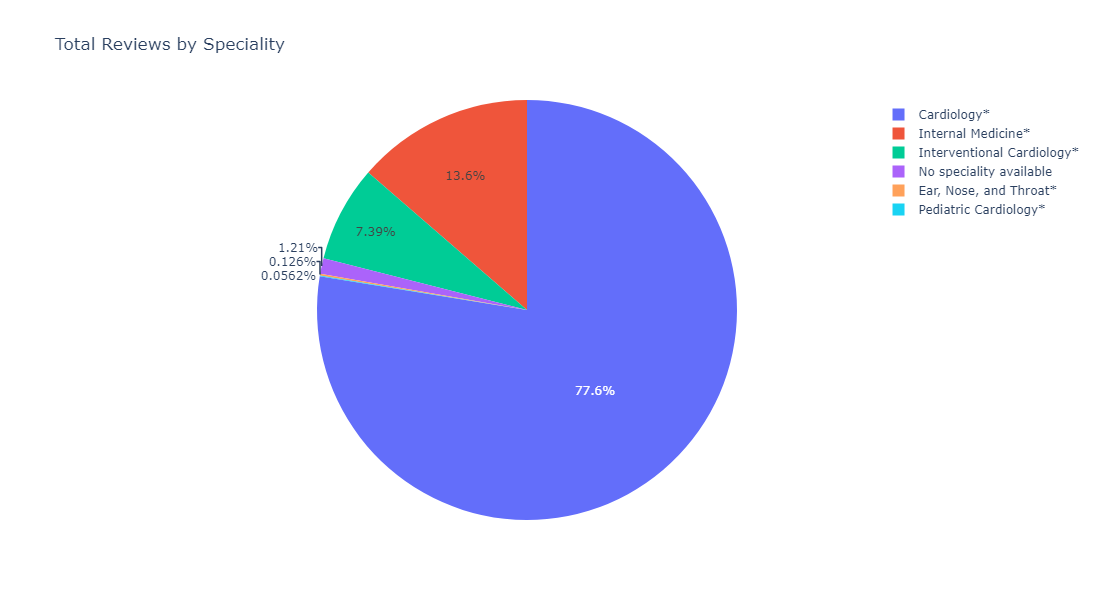

In [198]:
import plotly.express as px

fig = px.pie(df, 
             names='speciality', 
             values='Number of Reviews', 
             title='Total Reviews by Speciality',
             width=800,   # Set the width of the plot
             height=600)  # Set the height of the plot

# Show the pie chart
fig.show()

<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Correlate data of Number of reviews and ratings</li>

In [181]:
correlation = df['Number of Reviews'].corr(df['Rating'])
correlation

0.23911412286997089

<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Analysis on patient comments from
common complaints and praises using textblob</li>

In [188]:
# pip install pandas textblob matplotlib

       Health Provider Name   speciality  Gender  Age  Rating  \
0     Dr. Ephron Shohat, MD  Cardiology*    Male   52     5.0   
1     Dr. Manish Parikh, MD  Cardiology*    Male   57     4.6   
2    Dr. Manuel Morlote, MD  Cardiology*    Male   57     4.8   
3      Dr. Sonia Tolani, MD  Cardiology*  Female   57     4.5   
4     Dr. Allison Spatz, MD  Cardiology*  Female   57     5.0   
..                      ...          ...     ...  ...     ...   
439     Dr. Linda Koshy, MD  Cardiology*  Female   35     0.0   
440  Dr. Eugenia Gianos, MD  Cardiology*  Female   49     5.0   
441    Dr. Caroline Ong, MD  Cardiology*  Female   41     5.0   
442      Dr. Bani Azari, MD  Cardiology*  Female   46     0.0   
443      Dr. Esad Vucic, MD  Cardiology*    Male   51     5.0   

     Number of Reviews                                           Location  \
0                   10  (Ephron Z Shohat MD LLC1763 E 12th StBrooklyn,...   
1                   18  (Center for Community Health at NewYork-P

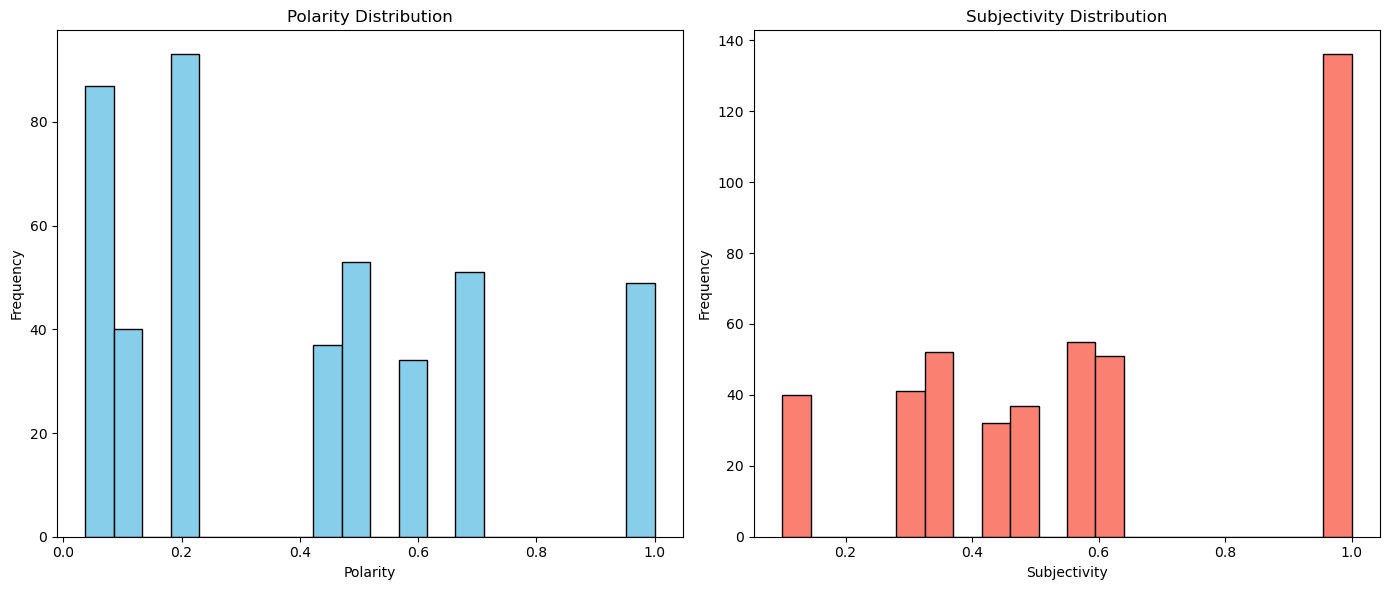

In [190]:
from textblob import TextBlob
def analyze_sentiment(comment):
    analysis = TextBlob(comment)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Apply the sentiment analysis function to each comment
df[['Polarity', 'Subjectivity']] = df['Patient Comments'].apply(lambda x: pd.Series(analyze_sentiment(x)))

# Print the DataFrame with sentiment scores
print(df)

# Plotting sentiment analysis results
plt.figure(figsize=(14, 6))

# Plot for Polarity
plt.subplot(1, 2, 1)
plt.hist(df['Polarity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Plot for Subjectivity
plt.subplot(1, 2, 2)
plt.hist(df['Subjectivity'], bins=20, color='salmon', edgecolor='black')
plt.title('Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Analyzed Reviews Score vs Rating using scatter plot</li>

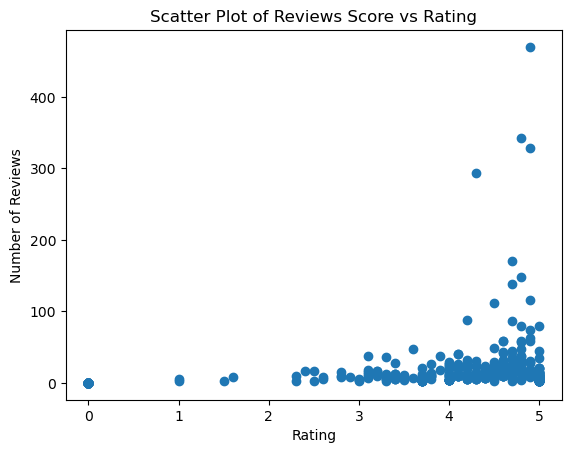

In [182]:
import matplotlib.pyplot as plt

plt.scatter(df['Rating'],df['Number of Reviews'])
plt.ylabel('Number of Reviews')
plt.xlabel('Rating')
plt.title('Scatter Plot of Reviews Score vs Rating')
plt.show()


<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Analyzed Speciality vs Rating</li>

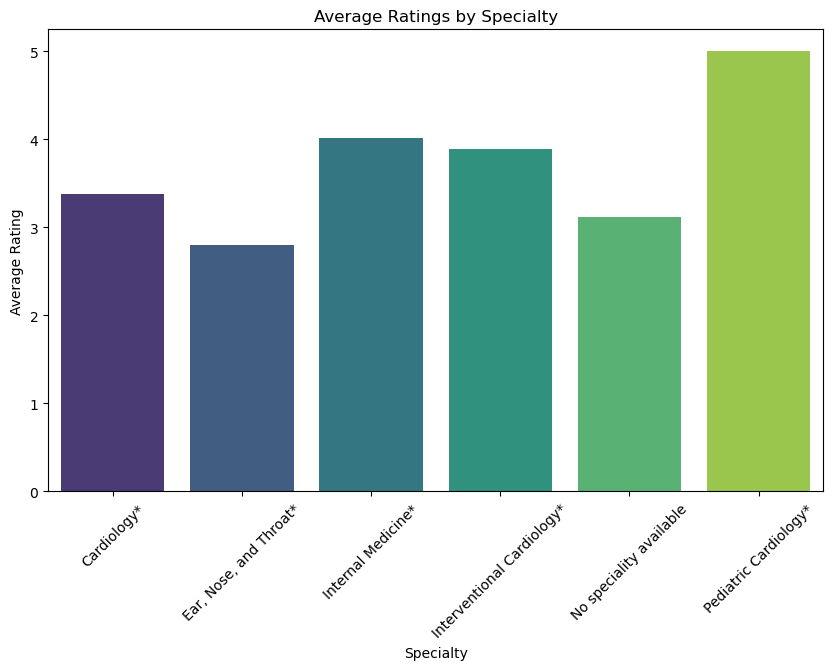

In [183]:
import seaborn as sns
avg_ratings = df.groupby('speciality')['Rating'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='speciality', y='Rating', data=avg_ratings, palette='viridis')
plt.xlabel('Specialty')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Specialty')
plt.xticks(rotation=45)
plt.show()

<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Analyzed patient comments using Word clouds</li>

In [185]:
# !pip install wordcloud

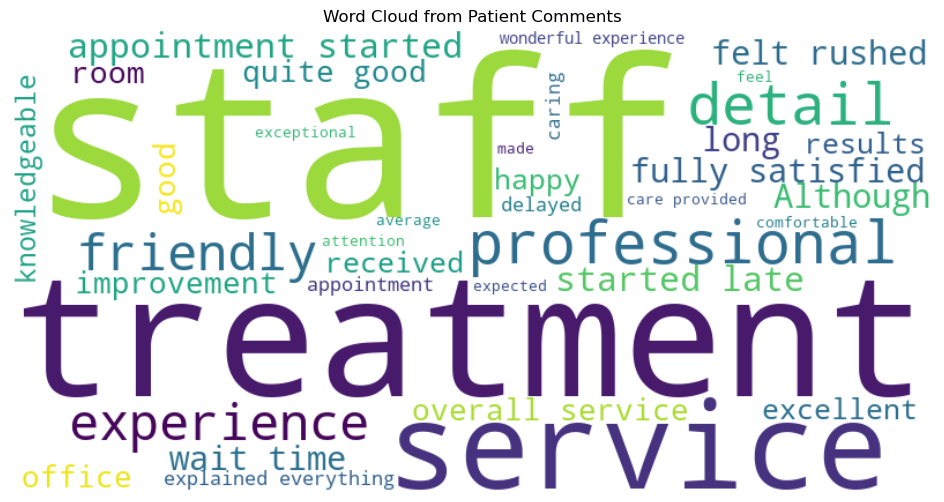

In [184]:
from wordcloud import WordCloud

text = ' '.join(df['Patient Comments'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Patient Comments')
plt.show()

<h3 style="list-style-type: circle,"font-family: Times New Roman, serif;">
    <li>Analyzed Number of counts on the basis of age, gender and speciality</li>

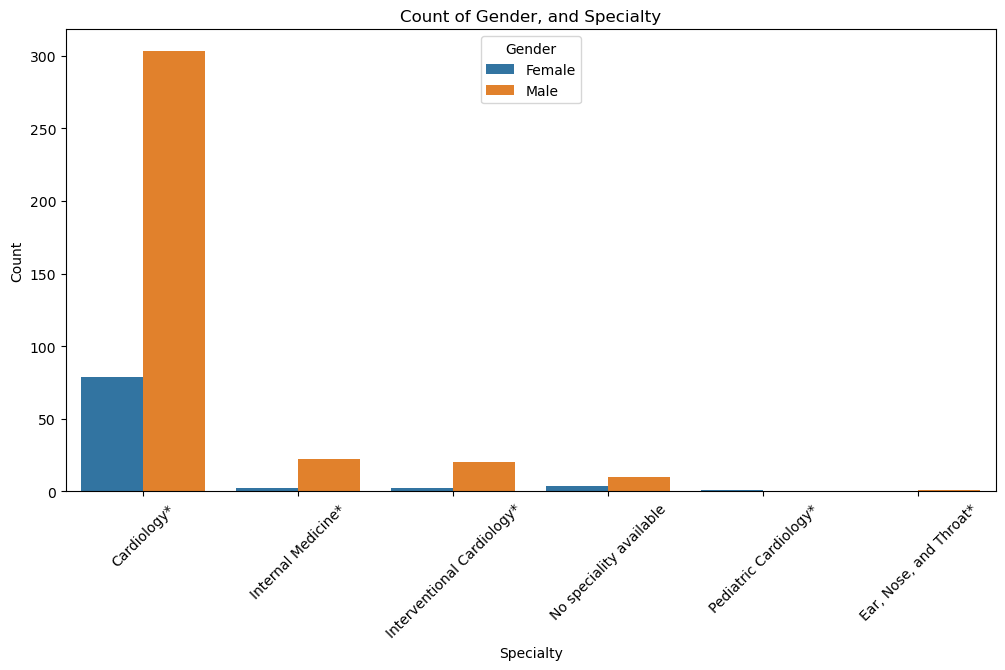

In [206]:
count_data = df.groupby(['Gender', 'speciality']).size().reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=count_data, x='speciality', y='Count', hue='Gender', dodge=True)

# Customize the plot
plt.title('Count of Gender, and Specialty')
plt.xlabel('Specialty')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Gender')

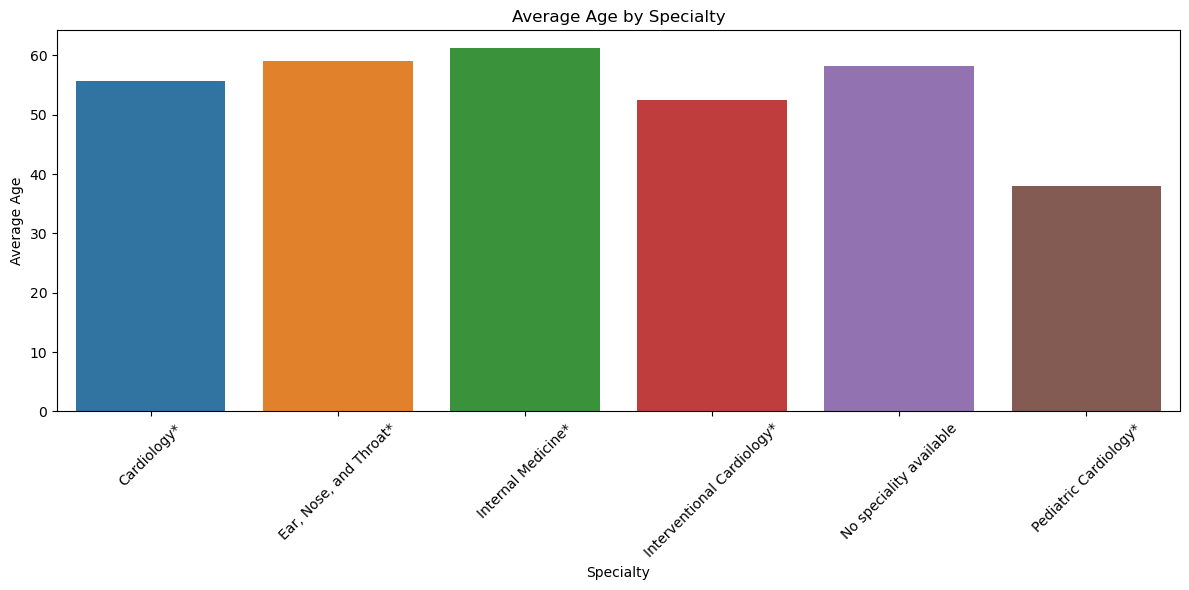

In [212]:
# Group by specialty and calculate the mean age
count_data2 = df.groupby(['speciality'])['Age'].mean().reset_index(name='Average Age')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=count_data2, x='speciality', y='Average Age')

# Customize the plot
plt.title('Average Age by Specialty')
plt.xlabel('Specialty')
plt.xticks(rotation=45)
plt.ylabel('Average Age')
plt.tight_layout()

# Show the plot
plt.show()



In [213]:
df.to_excel("healgradedata.xlsx",index= False)